## RegExp in Python

### Basic patterns

>   * **`.`**  - any single symbol except new line `\n`
>   * **`[]`** - range of symbols, such as `[0-9]`; `[A-Za-z]`. **`[^...]`** - range of excepted symbols
>   * **`\d`** - any digit, identical to `[0-9]`
>   * **`\D`** - every symbol except digit, ~ `[^0-9]`
>   * **`\w`** - any letter, digit or _
>   * **`\W`** - everything except letters, digits & _
>   * **`\s`** - any space symbol (incl. tab, `\n`, etc.)
>   * **`\S`** - everything except space symbols
>   * **`\\`** - escaping, for referencing special comman symbols of regexp
>   * **`\b`** - start or end of the word
>   * **`\B`** - neither the start or end of the word

### RE package

>   * **`re.search(pattern, string)`** - finding the first appearance of pattern in the string
>```python
re.search(r'\d\d\D\d\d', r'Телефон 123-12-12') == '23-12'
>```
>   * **`re.fullmatch(pattern, string)`** - check for a total match between string & pattern
>```python
re.fullmatch(r'\d\d\D\d\d', r'12-12') == True
>```
>   * **`re.split(pattern, string, maxsplit=0)`** - division across the substrings, identical to the pattern
>```python
re.split(r'\W+', 'Hey, where is my wallet?!') == ['Hey', 'where', 'is', 'my', 'wallet']
>```
>   * **`re.findall(pattern, string)`** - find all non-intersecting patterns
>```python
re.findall(r'\d\d\.\d\d\.\d{4}', 
                 r'I sent this email on 01.19.2018, and it was delivered only today, 09.01.2023') 
                     == ['01.19.2018', '09.01.2023']
>```
>   * **`re.sub(pattern, replacer, string, count=0)`** - change all patterns within the string to replacer
>```python
re.sub('\d', 'x', 'It cost us 322 rubles') == 'It cost us xxx rubles'
>```
>   * **`re.compile(pattern)`** - transform a string into class `Pattern` of re package
>   * **Pattern methods**:
>     * **`pattern.sub`** - replace
>     * **`.search`** - find first occurence
>     * **`.match`** - find occurence at the beginning of the string
>     * **`.split`** - split
>     * **`Match.group(i)`** - i-th subgroup of the match
>```python
m = re.match(r"(\w+) (\w+)", "Isaac Newton, physicist")
m.group(0) == Isaac Newton'
m.group(1) == 'Isaac'
m.group(2) == 'Newton'
m.group(1, 2) == ('Isaac', 'Newton')
>```

#### Flags
>   * **`re.IGNORECASE`** (**re.I**) - take both upper and lower cases
>   * **`re.MULTILINE`** (**re.M**) - can work with several lines of text

#### Task №1: introduction

1. Replace all occurrences of `5` with `five` for the given string.

2. Replace only the first occurrence of `5` with `five` for the given string.

3. For the given list, filter all elements that do not contain `e`.

4. Replace all occurrences of `note` irrespective of case with `X`.

5. For the given input string, display all lines not containing `start` irrespective of case.

In [2]:
import re
pat = re.compile(r'5')
pat.sub(r'five', 'xxx')

In [3]:
pat.sub(r'five', 'xxx', 1)

In [14]:
arr = ['june', 'july', 'august', 'september', 'october']
list(filter(lambda x: re.fullmatch(r'[^e]*', x), arr))

In [15]:
re.sub(r'note', r'X', 'xxx note NOTE nOtE', flags=re.IGNORECASE)

In [30]:
# 5 задача

input_txt = '''
First Line
Second start Line
Third not to start
And here is the end
'''

re.findall(r'.*start.*\n', input_txt)

#### Task №2: Next

1.  Check if the given strings start with `be`

2. For the given input list, filter all elements that contain `42` surrounded by word characters.

3.  For the given input list, filter all elements that start with `den` or end with `ly`

4. For the given input list, replace `hand` with `X` for all elements that start with `hand` followed by at least one word character.

In [19]:
m = re.match(r'^be', 'askdjhsbefdjhk')
f = [w for w in ['july', 'de42nkjdnf', 'sdfkjly', 'hjgd42enly', 'denly'] if re.match(r'\w*42\w*', w)]
s = [w for w in ['july', 'denkjdnf', 'sdfkjly', 'hjgdenly', 'denly'] if re.match(r'^den\.*ly$', w)]
f, s

In [21]:
[re.sub(r'hand', r'X', w, 1) for w in ['juhandly', 'handdenkjdnf', 'handsdfkjly', 'hjgdenly', 'denly'] if re.match(r'^hand\w+', w)]

#### Task №3: Escaping

1.  Replace `(4)\|` with `2` only at the start or end of the given input strings

2. Replace the backspace character `\b` with a single space character for the given input string.

In [23]:
re.sub(r'\|{4}$', r'||', re.sub(r'^\|{4}', r'||', '||||sajfhasfdjh||||asd||||'))
re.sub(r'\b', ' ', 'sfgdfg')

### Alternation & Grouping

>   * **`|`** - alternative for match, `A|B`
>   * **`[...]`** - described above, range of accepted symbols
>   * **`(?:...){}`** - pattern that can be repeated several times according to the following quantifier

### Quantifiers

>   * **`{n}`** - exactly n times the expression was identified consequently
>   * **`{m, n}`** - from m to n times
>   * **`{m,}`** - from m times
>   * **`{,n}`** - no more than n times
>   * **`?`** - zero or one match
>   * **`*`** - zero or more matches
>   * **`+`** - one or more matches
>   * **`{quantifier}?`** - non-greedy quantifier 

#### Task №4: Grouping & Alternative

1. For the given list, filter all elements that start with `den` or end with `ly`

2. For the given strings, replace all occurrences of `removed` or `reed` or `received` or `refused` with `X`.

3. For the given strings, replace all matches from the list `words` with `A`

In [ ]:
[re.sub(r'refused', r'X', re.sub(r'reed', r'X', re.sub(r'removed', r'X', w))) for w in arr]

#### Task №5: Quantifying

1. Replace `42//5` or `42/5` with `8` for the given input.

2. For the given input strings, remove everything from the first occurrence of `i` till the end of the string

3. For the given input strings, remove everything from the first occurrence of `test` (irrespective of case) till the end of the string, provided test isn't at the end of the string

4. For the input list `words`, filter all elements starting with `s` and containing `e` and `t` in any order.

5. For the input list `words`, remove all elements having less than 6 characters

### Position patterns

>   * **`^`** - start of text / line
>   * **`$`** - end of text / line
>   * **`\A`** - start of the text
>   * **`\Z`** - end of the text
>   * **`\b`**; **`\B`** - already described, start & end of word VS vice versa
>   * **`(?=...)`** - lookahead, all positions with pattern after 
>   * **`(?!...)`** - negative lookahead, vice versa
>   * **`(?<=...)`** - lookbehind, all positions with pattern going before
>   * **`(?<!...)`** - negative lookbehind, vice versa

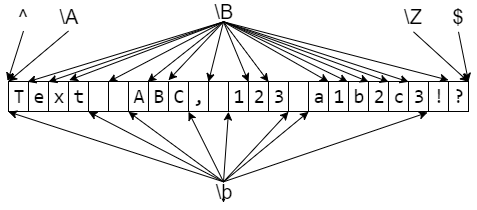

### Match

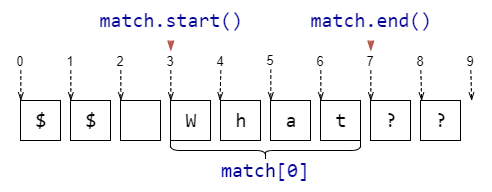

### Backregerence

>   * **`g<0>`** - entire captured group
>```python
re.sub(r'[a-z]+', r'{\g<0>}', '[52] apples and [31] mangoes')
'[52] {apples} {and} [31] {mangoes}'
>```
>   * **`g<i>`** - i-th captured portion
>   * **`\i`** - i-th captured portion
>```python
re.sub(r'(\w+),(\w+)', r'\2,\1', 'good,bad 42,24')
'bad,good 24,42'
>```

#### Task 6: Move on

1. Find the starting index of the first occurrence of `is` or `the` or `was` or `to` for the given input strings

2. The given input strings contains some text followed by `-` followed by a number. Replace that number with its `log` value.

3. Extract all words between `(` and `)` from the given input string as a list. Assume that the input will not contain any broken parentheses.

4. Replace all whole words `reed` or `read` or `red` with `X`.

#### Task №7: Look around

1. Replace all whole words with X unless it is preceded by a ( character.

2. Replace all whole words with X unless it is preceded by ( or followed by ) characters.

3. Extract all whole words that do not end with e or n.

4. For the given input strings, extract all overlapping two character sequences.

#### Task №8: Backref

1. Replace the space character that occurs after a word ending with `a` or `r` with a `newline` character.

2. Add `[]` around words starting with `s` and containing `e` and `t` in any order

3. Replace all whole words with `X` that start and end with the same word character (irrespective of case). Single character word should get replaced with `X` too, as it satisfies the stated condition.